In [43]:
import torch
import torchvision
from torchvision import transforms

In [44]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [45]:
trainset = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)

Files already downloaded and verified


In [46]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

In [47]:
testset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

Files already downloaded and verified


In [48]:
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

In [49]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

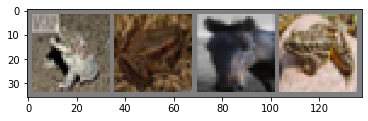

In [51]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [52]:
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

 frog  frog horse  frog


In [53]:
from torch import nn
from torch.nn import functional as F

In [54]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [55]:
net = Net()

In [56]:
from torch import optim

In [57]:
criterion = nn.CrossEntropyLoss()
def loss_fn(outputs, labels):
    return criterion(outputs, labels) + \
            torch.norm(torch.cat([x.view(-1) for x in net.parameters()]), 2)

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [60]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.304
[1,  4000] loss: 2.304
[1,  6000] loss: 2.304
[1,  8000] loss: 2.304
[1, 10000] loss: 2.304
[1, 12000] loss: 2.304
[2,  2000] loss: 2.304
[2,  4000] loss: 2.304
[2,  6000] loss: 2.304
[2,  8000] loss: 2.304
[2, 10000] loss: 2.304
[2, 12000] loss: 2.304
[3,  2000] loss: 2.304
[3,  4000] loss: 2.304
[3,  6000] loss: 2.304
[3,  8000] loss: 2.304
[3, 10000] loss: 2.304
[3, 12000] loss: 2.304
[4,  2000] loss: 2.304
[4,  4000] loss: 2.304
[4,  6000] loss: 2.304
[4,  8000] loss: 2.304
[4, 10000] loss: 2.304
[4, 12000] loss: 2.304
[5,  2000] loss: 2.304
[5,  4000] loss: 2.304
[5,  6000] loss: 2.304
[5,  8000] loss: 2.304
[5, 10000] loss: 2.304
[5, 12000] loss: 2.304
Finished Training


In [61]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %
